# Project Part B: Transformation

![](banner_project.jpg)

In [32]:
analyst = "Khoa Nguyen" # Replace this with your name

In [33]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
options(repr.matrix.max.rows=674)
update_geom_defaults("point", list(size=1))
update_geom_defaults("col", list(fill=PALETTE[1]))

## Introduction

### Objective

Transform the representation of public company fundamentals.  Later, use the transformed dataset along with additional analysis to recommend a portfolio of 12 company investments that maximizes 12-month return of an overall \$1,000,000 investment.

### Approach

Retrieve a public company fundamentals dataset comprising thousands of US companies from quarters 1, 2, 3, and 4 of year 2017 + company stock price data for those companies from quarter 4 of year 2018.  The dataset has been prepared such that each company and its associated information is represented as a single observation.

Transform the dataset using variable filtration, imputation, principal component analysis, and other methods to ready it for predictive model construction.

## Data

In [34]:
# Retrieve prepared data.
# How many observations and variables?
# Present the first few observations and first few variables.

data.raw = read.csv("My Prepared Data.csv", header=TRUE, na.strings=c("NA", ""), stringsAsFactors=FALSE)
data.raw$big_growth = factor(data.raw$big_growth, levels=c("YES","NO"))
    
size(data.raw)
fmtx(data.raw[1:6, 1:13], "data.raw (first few observations, first few variables variables)")
# fmtx(data.raw[1:3,], FFO)  # takes about 2 minutes to display all variables

observations variables
1 4305         2714

data.raw (first few observations, first few variables variables) 
 
 
 big_growth 
 growth 
 prccq 
 gvkey 
 tic 
 conm 
 datadate.q1 
 fyearq.q1 
 fqtr.q1 
 fyr.q1 
 indfmt.q1 
 consol.q1 
 popsrc.q1 
 
 
 
 
 NO 
 0.0507 
 43.69 
 1,004 
 AIR 
 AAR CORP 
 02/28/2017 
 2,016 
 3 
 5 
 INDL 
 C 
 D 
 
 
 NO 
 -0.3829 
 32.11 
 1,045 
 AAL 
 AMERICAN AIRLINES GROUP INC 
 03/31/2017 
 2,017 
 1 
 12 
 INDL 
 C 
 D 
 
 
 YES 
 0.3158 
 6.75 
 1,050 
 CECE 
 CECO ENVIRONMENTAL CORP 
 03/31/2017 
 2,017 
 1 
 12 
 INDL 
 C 
 D 
 
 
 NO 
 -0.2165 
 8.66 
 1,062 
 ASA 
 ASA GOLD AND PRECIOUS METALS 
 02/28/2017 
 2,017 
 1 
 11 
 INDL 
 C 
 D 
 
 
 NO 
 -0.1185 
 15.25 
 1,072 
 AVX 
 AVX CORP 
 03/31/2017 
 2,016 
 4 
 3 
 INDL 
 C 
 D 
 
 
 NO 
 0.0002 
 85.20 
 1,075 
 PNW 
 PINNACLE WEST CAPITAL CORP 
 03/31/2017 
 2,017 
 1 
 12 
 INDL 
 C 
 D

In [36]:
# Specify which variables can later be used as outcome, identifier, and predictor variables.
outvars = colnames(data.raw[1:3])
idvars = colnames(data.raw[4:6])
prevars = colnames(data.raw[4:ncol(data.raw)])
fmtsx(fmt(outvars), fmt(idvars),fmt(prevars[1:10], FFO))


outvars 
 
 
 
 
 big_growth 
 
 
 growth 
 
 
 prccq 
 
 
 

 
 

 

 
 
 idvars 
 
 
 
 
 gvkey 
 
 
 tic 
 
 
 conm 
 
 
 

 
 

 
 prevars (first few observations) 
 
 
 prevars[1:10] 
 
 
 
 
 gvkey 
 
 
 tic 
 
 
 conm 
 
 
 datadate.q1 
 
 
 fyearq.q1 
 
 
 fqtr.q1 
 
 
 fyr.q1 
 
 
 indfmt.q1 
 
 
 consol.q1 
 
 
 popsrc.q1

## Transform

### Filter Out Sparse Variables

In [37]:
# Filter the data to include only predictor variables with at least 95% non-missing values. 
# Keep the variable names from the resulting dataset for later use.
# How many observations and variables in the resulting dataset?
#
# You can use select_if(..., ~mean(is.na(.))<...)
# You can use colnames(...) 

data.filter = select_if(data.raw[, prevars], ~mean(is.na(.)) < 0.05)
cn = colnames(data.filter)
fmtx(size(data.filter), "data after variable filtration")

data after variable filtration 
 
 
 observations 
 variables 
 
 
 
 
 4,305 
 200

### Impute

In [38]:
# Impute missing data:
# for each numerical variable, use the mean of non-missing values;
# for each non-numerical variable, use the mode of non-missing values.
# Keep the imputed values used for each variable for future use.
#
# You can use get_impute(...)
# You can use impute(...)
#
# get_impute(data) provides a list of means and modes, one element for each variable of data.
# impute(data) provides a table like data, but imputed.

imputed_data = impute(data.filter)
fmtx(size(imputed_data), "data after imputation")

data after imputation 
 
 
 observations 
 variables 
 
 
 
 
 4,305 
 200

### Principal Component Analysis

In [39]:
# For principal component analysis, filter the data to include only numerical variables with non-zero variance.
# How many observations and variables?
#
# You can use select_if(..., ...)
# You can use is.numeric(...)
# You can use var(..., na.rm=TRUE)!=0

data.var = select_if(imputed_data,~is.numeric(.))
data.var = select_if(data.var, ~var(., na.rm=TRUE) != 0)
fmtx(size(data.var), "data after keeping numerical variables and removing zero-variance variables")



data after keeping numerical variables and removing zero-variance variables 
 
 
 observations 
 variables 
 
 
 
 
 4,305 
 151

In [40]:
# Perform principal component analysis on the data (use scale=TRUE).
# Keep the centroid and weight matrix information (calculated by prcomp) for later use.
# Present the first few observations represented as principal components.
# For the first three principal components, +/- may be different than as shown in the expected output.
# If so, then multiply by -1 to adjust.
#
# You can use pc = prcomp(..., ..., ...)
# You can use as.data.frame(pc$x)

pc = prcomp(data.var, scale = TRUE, retx=TRUE)
centroid = pc$center
weight_matrix = pc$rotation
data.pc = as.data.frame(pc$x)
fmtx(size(data.pc))
fmtx(data.pc[1:5,], FFO)

size(data.pc) 
 
 
 observations 
 variables 
 
 
 
 
 4,305 
 151

data.pc (first few observations) 
 
 
 PC1 
 PC2 
 PC3 
 PC4 
 PC5 
 PC6 
 PC7 
 PC8 
 PC9 
 PC10 
 PC11 
 PC12 
 PC13 
 PC14 
 PC15 
 PC16 
 PC17 
 PC18 
 PC19 
 PC20 
 PC21 
 PC22 
 PC23 
 PC24 
 PC25 
 PC26 
 PC27 
 PC28 
 PC29 
 PC30 
 PC31 
 PC32 
 PC33 
 PC34 
 PC35 
 PC36 
 PC37 
 PC38 
 PC39 
 PC40 
 PC41 
 PC42 
 PC43 
 PC44 
 PC45 
 PC46 
 PC47 
 PC48 
 PC49 
 PC50 
 PC51 
 PC52 
 PC53 
 PC54 
 PC55 
 PC56 
 PC57 
 PC58 
 PC59 
 PC60 
 PC61 
 PC62 
 PC63 
 PC64 
 PC65 
 PC66 
 PC67 
 PC68 
 PC69 
 PC70 
 PC71 
 PC72 
 PC73 
 PC74 
 PC75 
 PC76 
 PC77 
 PC78 
 PC79 
 PC80 
 PC81 
 PC82 
 PC83 
 PC84 
 PC85 
 PC86 
 PC87 
 PC88 
 PC89 
 PC90 
 PC91 
 PC92 
 PC93 
 PC94 
 PC95 
 PC96 
 PC97 
 PC98 
 PC99 
 PC100 
 PC101 
 PC102 
 PC103 
 PC104 
 PC105 
 PC106 
 PC107 
 PC108 
 PC109 
 PC110 
 PC111 
 PC112 
 PC113 
 PC114 
 PC115 
 PC116 
 PC117 
 PC118 
 PC119 
 PC120 
 PC121 
 PC122 
 PC123 
 PC124 
 PC125 
 PC126 
 PC127 
 PC128 
 PC129 
 PC130 
 PC131 
 PC132 
 PC133 
 PC134 
 PC135 
 PC136 
 PC137 
 PC138 
 PC139 
 PC140 
 PC141 
 PC142 
 PC143 
 PC144 
 PC145 
 PC146 
 PC147 
 PC148 
 PC149 
 PC150 
 PC151 
 
 
 
 
 1.410 
 0.2125 
 -0.1874 
 -1.3446 
 -0.0365 
 -5.0250 
 0.8071 
 0.2309 
 0.4172 
 -1.4908 
 0.3994 
 0.5379 
 -0.5058 
 -0.2376 
 -0.8975 
 0.4677 
 -0.3083 
 -0.5156 
 -0.1502 
 0.2973 
 -0.4995 
 -0.0990 
 1.9734 
 -0.6419 
 -0.1416 
 0.2178 
 -0.6018 
 0.6090 
 -0.5942 
 0.5064 
 -0.6464 
 -0.0502 
 -0.5665 
 0.3006 
 -0.0875 
 0.2465 
 -0.1563 
 0.0019 
 0.0561 
 -0.5498 
 0.3555 
 -0.5470 
 0.1180 
 0.0364 
 -0.3127 
 0.2646 
 -0.0167 
 -0.1623 
 -0.0928 
 -0.0912 
 0.0304 
 -0.1404 
 -0.0747 
 -0.0578 
 -0.0409 
 -0.2472 
 -0.0858 
 0.0510 
 -0.0479 
 0.0826 
 0.0453 
 0.0228 
 -0.0906 
 -0.0381 
 0.0861 
 -2.0111 
 -0.0631 
 -0.2573 
 0.1119 
 0.0945 
 -0.1856 
 -0.1731 
 0.0098 
 0.0448 
 -0.0003 
 0.1609 
 0.0442 
 -0.0001 
 0.0347 
 0.0322 
 -0.0018 
 -0.0120 
 0.0258 
 -0.0921 
 0.0522 
 0.2749 
 0.0012 
 0.0168 
 0.0043 
 -0.0066 
 0.0054 
 0.0153 
 0.0618 
 -0.0117 
 -0.0049 
 -0.0011 
 0.0015 
 0.0054 
 0.0018 
 0.0084 
 0.0033 
 0.0010 
 0.0006 
 -0.0015 
 -0.0096 
 0.0619 
 0.0635 
 0.0066 
 -0.0068 
 0.0014 
 0.0032 
 -0.0035 
 0.0022 
 0.0031 
 -0.0006 
 -0.0001 
 0.0007 
 0.0003 
 -0.0003 
 0.0020 
 0.0037 
 0.0039 
 -0.0035 
 -0.0008 
 0.0001 
 0.0000 
 -0.0002 
 -0.0002 
 -0.0002 
 0.0002 
 0.0002 
 -0.0001 
 0 
 -0.0003 
 0.0001 
 -0.0001 
 0.0000 
 -0.0003 
 -0.0004 
 0.0001 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 -2.809 
 0.2246 
 1.4366 
 -3.2326 
 0.3686 
 1.4262 
 2.0046 
 -1.6757 
 1.5734 
 -0.3330 
 -1.3086 
 0.5723 
 -0.8130 
 -1.0506 
 -0.0734 
 -0.3888 
 -0.5811 
 -0.2254 
 -0.0111 
 1.1778 
 -0.8165 
 0.0745 
 0.5923 
 0.0167 
 0.9120 
 1.1850 
 -1.4301 
 0.4664 
 -0.0315 
 0.8459 
 -0.6697 
 -0.1106 
 -0.6007 
 0.0275 
 -0.3750 
 0.4091 
 -0.0069 
 0.3631 
 0.6225 
 -0.3679 
 0.6465 
 -0.6724 
 -0.6289 
 0.4487 
 1.8103 
 0.1408 
 -0.2033 
 0.7024 
 0.0321 
 0.5757 
 0.1138 
 0.6064 
 0.3519 
 0.2820 
 0.0887 
 0.7010 
 -0.0059 
 0.2624 
 0.1188 
 -0.2571 
 -0.0079 
 0.5821 
 -0.1975 
 -0.1200 
 0.3267 
 0.0467 
 -0.2717 
 -0.1656 
 0.0418 
 -0.0355 
 0.3235 
 -0.2228 
 -0.0926 
 0.0325 
 -0.1373 
 -0.0148 
 0.1639 
 -0.1332 
 -0.0333 
 -0.2682 
 0.1384 
 -0.0062 
 0.0369 
 -0.0591 
 -0.0189 
 -0.0044 
 -0.0045 
 -0.0206 
 -0.0780 
 0.0925 
 -0.0403 
 0.0217 
 -0.0019 
 -0.1289 
 -0.0192 
 0.0018 
 0.0181 
 -0.0960 
 -0.0802 
 -0.0176 
 0.0148 
 0.0053 
 0.0522 
 -0.0090 
 -0.0021 
 -0.0087 
 0.0121 
 -0.0565 
 0.0038 
 0.0121 
 0.0012 
 0.0239 
 -0.0272 
 -0.0024 
 -0.0032 
 0.0037 
 0.0001 
 0.0005 
 0.0007 
 -0.0019 
 -0.0067 
 0.0009 
 0.0000 
 0.0014 
 -0.0008 
 0.0021 
 0.0007 
 -0.0005 
 -0.0008 
 -0.0005 
 0.0008 
 0.0008 
 0 
 0.0000 
 -0.0001 
 0.0003 
 0.0001 
 0.0000 
 -0.0001 
 0.0000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1.525 
 0.4396 
 -0.1679 
 -0.4734 
 0.6653 
 0.3661 
 2.2428 
 1.3493 
 0.0613 
 0.0645 
 -0.0753 
 0.1220 
 -0

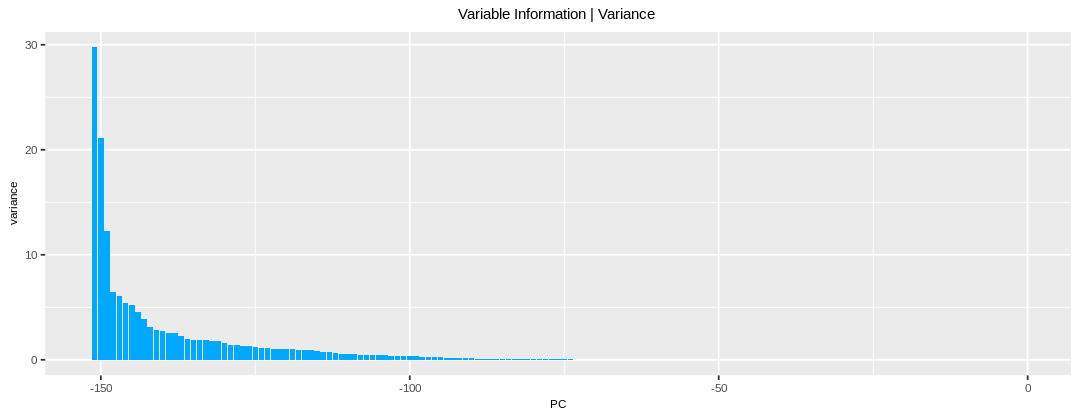

In [41]:
out(9,3.5)
var.pc = as.numeric(summarize_all(data.pc, var))
scree_data = data.frame(Principal_Component = 1:length(var.pc), Variance = var.pc)
ggplot(scree_data)  +
 geom_col(aes(x = -rank(Variance, ties.method = "first"), 
              y = Variance), fill = PALETTE[1], width = 0.9) +
 xlab("PC") + ylab("variance") +
 ggtitle("Variable Information | Variance ") +
 theme.no_legend

### Restore Outcome and Identifier Variables

In [42]:
# Restore the outcome and indentifier variables to the data.
# How many observations and variables?
# Present the first few observations of the resulting dataset.
data.pcv = cbind(data.raw[, 1:6], data.pc)
fmtx(size(data.pcv))
fmtx(data.pcv[1:5,], FFO)


size(data.pcv) 
 
 
 observations 
 variables 
 
 
 
 
 4,305 
 157

data.pcv (first few observations) 
 
 
 big_growth 
 growth 
 prccq 
 gvkey 
 tic 
 conm 
 PC1 
 PC2 
 PC3 
 PC4 
 PC5 
 PC6 
 PC7 
 PC8 
 PC9 
 PC10 
 PC11 
 PC12 
 PC13 
 PC14 
 PC15 
 PC16 
 PC17 
 PC18 
 PC19 
 PC20 
 PC21 
 PC22 
 PC23 
 PC24 
 PC25 
 PC26 
 PC27 
 PC28 
 PC29 
 PC30 
 PC31 
 PC32 
 PC33 
 PC34 
 PC35 
 PC36 
 PC37 
 PC38 
 PC39 
 PC40 
 PC41 
 PC42 
 PC43 
 PC44 
 PC45 
 PC46 
 PC47 
 PC48 
 PC49 
 PC50 
 PC51 
 PC52 
 PC53 
 PC54 
 PC55 
 PC56 
 PC57 
 PC58 
 PC59 
 PC60 
 PC61 
 PC62 
 PC63 
 PC64 
 PC65 
 PC66 
 PC67 
 PC68 
 PC69 
 PC70 
 PC71 
 PC72 
 PC73 
 PC74 
 PC75 
 PC76 
 PC77 
 PC78 
 PC79 
 PC80 
 PC81 
 PC82 
 PC83 
 PC84 
 PC85 
 PC86 
 PC87 
 PC88 
 PC89 
 PC90 
 PC91 
 PC92 
 PC93 
 PC94 
 PC95 
 PC96 
 PC97 
 PC98 
 PC99 
 PC100 
 PC101 
 PC102 
 PC103 
 PC104 
 PC105 
 PC106 
 PC107 
 PC108 
 PC109 
 PC110 
 PC111 
 PC112 
 PC113 
 PC114 
 PC115 
 PC116 
 PC117 
 PC118 
 PC119 
 PC120 
 PC121 
 PC122 
 PC123 
 PC124 
 PC125 
 PC126 
 PC127 
 PC128 
 PC129 
 PC130 
 PC131 
 PC132 
 PC133 
 PC134 
 PC135 
 PC136 
 PC137 
 PC138 
 PC139 
 PC140 
 PC141 
 PC142 
 PC143 
 PC144 
 PC145 
 PC146 
 PC147 
 PC148 
 PC149 
 PC150 
 PC151 
 
 
 
 
 NO 
 0.0507 
 43.69 
 1,004 
 AIR 
 AAR CORP 
 1.410 
 0.2125 
 -0.1874 
 -1.3446 
 -0.0365 
 -5.0250 
 0.8071 
 0.2309 
 0.4172 
 -1.4908 
 0.3994 
 0.5379 
 -0.5058 
 -0.2376 
 -0.8975 
 0.4677 
 -0.3083 
 -0.5156 
 -0.1502 
 0.2973 
 -0.4995 
 -0.0990 
 1.9734 
 -0.6419 
 -0.1416 
 0.2178 
 -0.6018 
 0.6090 
 -0.5942 
 0.5064 
 -0.6464 
 -0.0502 
 -0.5665 
 0.3006 
 -0.0875 
 0.2465 
 -0.1563 
 0.0019 
 0.0561 
 -0.5498 
 0.3555 
 -0.5470 
 0.1180 
 0.0364 
 -0.3127 
 0.2646 
 -0.0167 
 -0.1623 
 -0.0928 
 -0.0912 
 0.0304 
 -0.1404 
 -0.0747 
 -0.0578 
 -0.0409 
 -0.2472 
 -0.0858 
 0.0510 
 -0.0479 
 0.0826 
 0.0453 
 0.0228 
 -0.0906 
 -0.0381 
 0.0861 
 -2.0111 
 -0.0631 
 -0.2573 
 0.1119 
 0.0945 
 -0.1856 
 -0.1731 
 0.0098 
 0.0448 
 -0.0003 
 0.1609 
 0.0442 
 -0.0001 
 0.0347 
 0.0322 
 -0.0018 
 -0.0120 
 0.0258 
 -0.0921 
 0.0522 
 0.2749 
 0.0012 
 0.0168 
 0.0043 
 -0.0066 
 0.0054 
 0.0153 
 0.0618 
 -0.0117 
 -0.0049 
 -0.0011 
 0.0015 
 0.0054 
 0.0018 
 0.0084 
 0.0033 
 0.0010 
 0.0006 
 -0.0015 
 -0.0096 
 0.0619 
 0.0635 
 0.0066 
 -0.0068 
 0.0014 
 0.0032 
 -0.0035 
 0.0022 
 0.0031 
 -0.0006 
 -0.0001 
 0.0007 
 0.0003 
 -0.0003 
 0.0020 
 0.0037 
 0.0039 
 -0.0035 
 -0.0008 
 0.0001 
 0.0000 
 -0.0002 
 -0.0002 
 -0.0002 
 0.0002 
 0.0002 
 -0.0001 
 0 
 -0.0003 
 0.0001 
 -0.0001 
 0.0000 
 -0.0003 
 -0.0004 
 0.0001 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 NO 
 -0.3829 
 32.11 
 1,045 
 AAL 
 AMERICAN AIRLINES GROUP INC 
 -2.809 
 0.2246 
 1.4366 
 -3.2326 
 0.3686 
 1.4262 
 2.0046 
 -1.6757 
 1.5734 
 -0.3330 
 -1.3086 
 0.5723 
 -0.8130 
 -1.0506 
 -0.0734 
 -0.3888 
 -0.5811 
 -0.2254 
 -0.0111 
 1.1778 
 -0.8165 
 0.0745 
 0.5923 
 0.0167 
 0.9120 
 1.1850 
 -1.4301 
 0.4664 
 -0.0315 
 0.8459 
 -0.6697 
 -0.1106 
 -0.6007 
 0.0275 
 -0.3750 
 0.4091 
 -0.0069 
 0.3631 
 0.6225 
 -0.3679 
 0.6465 
 -0.6724 
 -0.6289 
 0.4487 
 1.8103 
 0.1408 
 -0.2033 
 0.7024 
 0.0321 
 0.5757 
 0.1138 
 0.6064 
 0.3519 
 0.2820 
 0.0887 
 0.7010 
 -0.0059 
 0.2624 
 0.1188 
 -0.2571 
 -0.0079 
 0.5821 
 -0.1975 
 -0.1200 
 0.3267 
 0.0467 
 -0.2717 
 -0.1656 
 0.0418 
 -0.0355 
 0.3235 
 -0.2228 
 -0.0926 
 0.0325 
 -0.1373 
 -0.0148 
 0.1639 
 -0.1332 
 -0.0333 
 -0.2682 
 0.1384 
 -0.0062 
 0.0369 
 -0.0591 
 -0.0189 
 -0.0044 
 -0.0045 
 -0.0206 
 -0.0780 
 0.0925 
 -0.0403 
 0.0217 
 -0.0019 
 -0.1289 
 -0.0192 
 0.0018 
 0.0181 
 -0.0960 
 -0.0802 
 -0.0176 
 0.0148 
 0.0053 
 0.0522 
 -0.0090 
 -0.0021 
 -0.0087 
 0.0121 
 -0.0565 
 0.0038 
 0.0121 
 0.0012 
 0.0239 
 -0.0272 
 -0.0024 
 -0.0032 
 0.0037 
 0.0001 
 0.0005 
 0.0007 
 -0.0019 
 -0.0067 
 0.0009 
 0.0000 
 0.0014 
 -0.0008 
 0.0021 
 0.0007 
 -0.0005 
 -0.0008 
 -0.0005 
 0.0008 
 0.0008 
 0 
 0.0000 
 -0.0001 
 0.0003 
 0.0001 
 0.0000 
 -0.0001 
 0.0

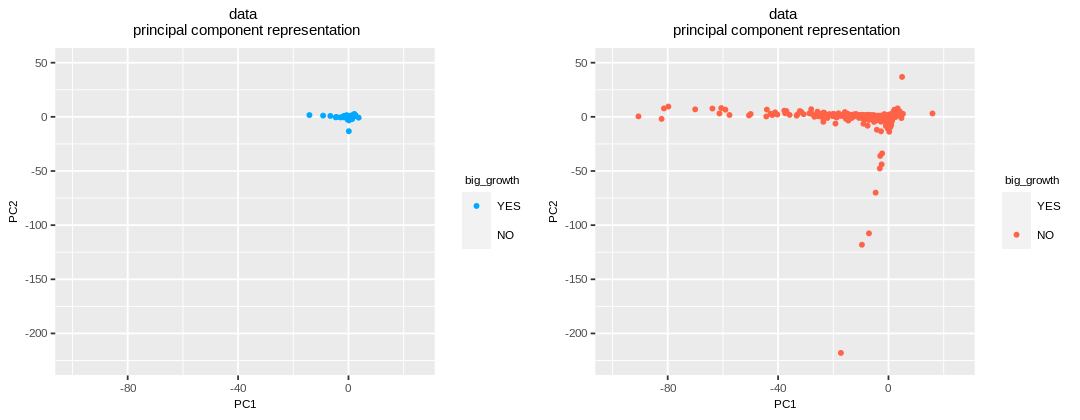

In [43]:
# Present 2D scatterplots to visualize PC1 vs PC2 vs big_growth
# (PC1 on horizontal axis, PC2 on vertical axis, and big_growth color-coded).
# You can use ... + geom_point(aes(..., color=big_growth, alpha=big_growth) + scale_alpha_manual(values=c(1,0)) ... to adjust transparency
# You can use ... + geom_point(aes(..., color=big_growth, alpha=big_growth) + scale_alpha_manual(values=c(0,1)) ... to adjust transparency
# You can use ... + theme.legend_title to show legend title  

yes1.2 = ggplot(data.pcv) + geom_point(aes(x = PC1, y = PC2, color = big_growth, alpha = big_growth)) +
 xlim(-100, 25) +
 ylim(-225, 50) +
 scale_alpha_manual(values = c(1, 0)) +
xlab("PC1") + ylab("PC2") + ggtitle("data \n principal component representation") +
 theme.legend_title


no1.2 = ggplot(data.pcv) + geom_point(aes(x = PC1, y = PC2, color = big_growth, alpha = big_growth)) +
 xlim(-100, 25) +
 ylim(-225, 50) +
 scale_alpha_manual(values = c(0, 1)) +
xlab("PC1") + ylab("PC2") + ggtitle("data \n principal component representation") +
 theme.legend_title

grid.arrange(yes1.2, no1.2 , ncol = 2)

In [44]:
# Present 2D scatterplots to visualize PC1 vs PC3 vs big_growth
# (PC1 on horizontal axis, PC3 on vertical axis, and big_growth color-coded).



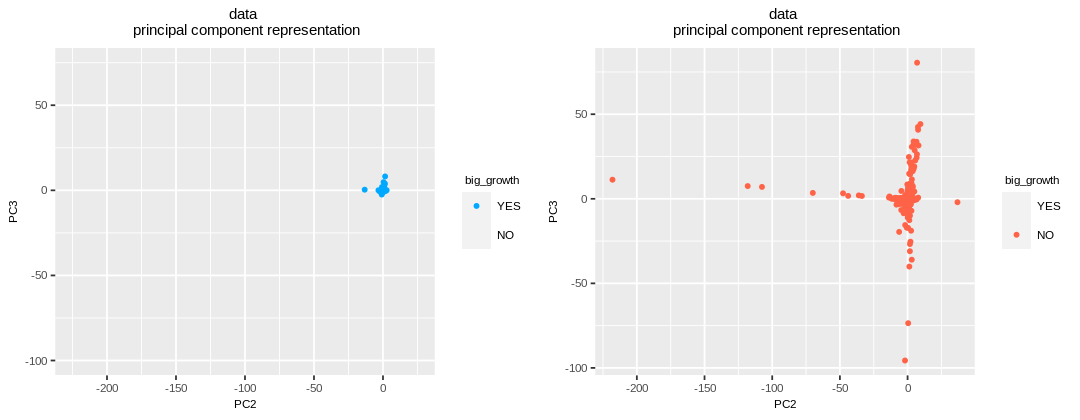

In [45]:
# Present 2D scatterplots to visualize PC2 vs PC3 vs big_growth
# (PC2 on horizontal axis, PC3 on vertical axis, and big_growth color-coded).

yes2.3 = ggplot(data.pcv) + geom_point(aes(x = PC2, y = PC3, color = big_growth, alpha = big_growth)) +
 xlim(-225, 25) +
 ylim(-100, 75) +
 scale_alpha_manual(values = c(1, 0)) +
xlab("PC2") + ylab("PC3") + ggtitle("data \n principal component representation") +
 theme.legend_title


no2.3 = ggplot(data.pcv) + geom_point(aes(x = PC2, y = PC3, color = big_growth, alpha = big_growth)) +

 scale_alpha_manual(values = c(0, 1)) +
xlab("PC2") + ylab("PC3") + ggtitle("data \n principal component representation") +
 theme.legend_title

grid.arrange(yes2.3, no2.3 , ncol = 2)

### Filter Out Low-Variance Variables

In [46]:
# Filter the data to include only the outcome variables, identifier variables, and first three principal components.
# Update the specification of predictor variables.
#
# Present the outcome variables and predictor variables.
# How many observations and variables in the resulting dataset?
# Present the first few observations of the resulting dataset.
prevars = colnames(data.pcv[4:9])
fmtsx(fmt(outvars), fmt(prevars))
data = data.pcv[, 1:9]
fmtx(size(data))
fmtx(data[1:6,], FFO)


outvars 
 
 
 
 
 big_growth 
 
 
 growth 
 
 
 prccq 
 
 
 

 
 

 

 
 
 prevars 
 
 
 
 
 gvkey 
 
 
 tic 
 
 
 conm 
 
 
 PC1 
 
 
 PC2 
 
 
 PC3

size(data) 
 
 
 observations 
 variables 
 
 
 
 
 4,305 
 9

data (first few observations) 
 
 
 big_growth 
 growth 
 prccq 
 gvkey 
 tic 
 conm 
 PC1 
 PC2 
 PC3 
 
 
 
 
 NO 
 0.0507 
 43.69 
 1,004 
 AIR 
 AAR CORP 
 1.4098 
 0.2125 
 -0.1874 
 
 
 NO 
 -0.3829 
 32.11 
 1,045 
 AAL 
 AMERICAN AIRLINES GROUP INC 
 -2.8093 
 0.2246 
 1.4366 
 
 
 YES 
 0.3158 
 6.75 
 1,050 
 CECE 
 CECO ENVIRONMENTAL CORP 
 1.5247 
 0.4396 
 -0.1679 
 
 
 NO 
 -0.2165 
 8.66 
 1,062 
 ASA 
 ASA GOLD AND PRECIOUS METALS 
 1.5737 
 0.6384 
 0.0123 
 
 
 NO 
 -0.1185 
 15.25 
 1,072 
 AVX 
 AVX CORP 
 1.2813 
 0.4529 
 0.0929 
 
 
 NO 
 0.0002 
 85.20 
 1,075 
 PNW 
 PINNACLE WEST CAPITAL CORP 
 0.3698 
 -0.4861 
 -0.0128

### Store Transformed Data & Transformation Meta-Data 

In [47]:
# Store the variable names of the filtered data (200 variable names)
saveRDS(cn, "My Filter.rds")

In [48]:
# Store the imputation values (200 means and modes)
ml = get_impute(data.filter)
saveRDS(ml, "My Imputation.rds")

In [49]:
# Store the PC information (one data object produced by prcomp that contains centroids and weight matrix)
saveRDS(pc, "My PC.rds")

In [50]:
# Store the predictor variable names of the transformed data (6 variable names)
saveRDS(prevars, "My Predictors.rds")

In [51]:
# Store the transformed data (4305 observations, 9 variables)
write.csv(data, "My Data.csv", row.names=FALSE)

<p style="text-align:left; font-size:10px;">
Copyright (c) Huntsinger Associates, LLC
<span style="float:right;">
Document revised May 6, 2023
</span>
</p>